In [2]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, extract, inspect, func  

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Base.classes.keys()

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs)\
            .filter(extract('month', Measurement.date) == 6)\
            .order_by(Measurement.date.asc())\
            .all()

[('2010-06-01', 78.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 73.0),
 ('2010-06-01', 77.0),
 ('2010-06-01', 69.0),
 ('2010-06-01', 76.0),
 ('2010-06-01', 71.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 72.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 71.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 78.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 75.0),
 ('2010-06-03', 74.0),
 ('2010-06-03', 77.0),
 ('2010-06-03', 67.0),
 ('2010-06-03', 76.0),
 ('2010-06-03', 72.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 73.0),
 ('2010-06-04', 76.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 70.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 72.0),
 ('2010-06-04', 74.0),
 ('2010-06-04', 68.0),
 ('2010-06-05', 77.0),
 ('2010-06-05', 74.0),
 ('2010-06-05', 72.0),
 ('2010-06-05', 73.0),
 ('2010-06-05', 78.0),
 ('2010-06-05', 76.0),
 ('2010-06-05', 79.0),
 ('2010-06-

In [6]:
#  3. Convert the June temperatures to a list.
JuneTemp = []
JuneTemp = session.query(Measurement.date, Measurement.tobs)\
            .filter(extract('month', Measurement.date) == 6)\
            .order_by(Measurement.date.asc())\
            .all()
JuneTemp

[('2010-06-01', 78.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 73.0),
 ('2010-06-01', 77.0),
 ('2010-06-01', 69.0),
 ('2010-06-01', 76.0),
 ('2010-06-01', 71.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 72.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 71.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 78.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 75.0),
 ('2010-06-03', 74.0),
 ('2010-06-03', 77.0),
 ('2010-06-03', 67.0),
 ('2010-06-03', 76.0),
 ('2010-06-03', 72.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 73.0),
 ('2010-06-04', 76.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 70.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 72.0),
 ('2010-06-04', 74.0),
 ('2010-06-04', 68.0),
 ('2010-06-05', 77.0),
 ('2010-06-05', 74.0),
 ('2010-06-05', 72.0),
 ('2010-06-05', 73.0),
 ('2010-06-05', 78.0),
 ('2010-06-05', 76.0),
 ('2010-06-05', 79.0),
 ('2010-06-

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
JuneTemp_df = pd.DataFrame(JuneTemp, columns = ['date', 'Temp'])
JuneTemp_df.set_index(JuneTemp_df['date'], inplace=True)
JuneTemp_df = JuneTemp_df[['Temp']]
JuneTemp_df

,Temp
date,
2010-06-01,78.0
2010-06-01,74.0
2010-06-01,73.0
2010-06-01,77.0
2010-06-01,69.0
...,...
2017-06-30,81.0
2017-06-30,74.0
2017-06-30,75.0


Text(0, 0.5, 'June_Temps')

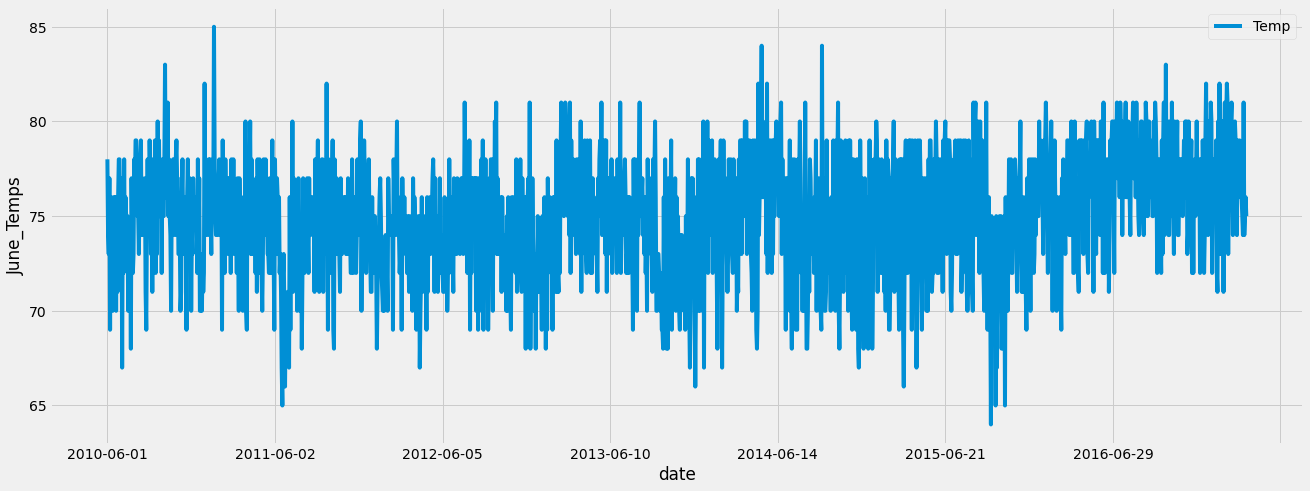

In [8]:
JuneTemp_df.plot(figsize = (20,7.5))
plt.ylabel ("June_Temps")

In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
JuneTemp_df.describe()

,Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs)\
            .filter(extract('month', Measurement.date) == 12)\
            .order_by(Measurement.date.asc())\
            .all()

[('2010-12-01', 76.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 78.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 70.0),
 ('2010-12-01', 71.0),
 ('2010-12-02', 72.0),
 ('2010-12-02', 73.0),
 ('2010-12-02', 75.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 73.0),
 ('2010-12-03', 71.0),
 ('2010-12-03', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 72.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 67.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 72.0),
 ('2010-12-04', 78.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 75.0),
 ('2010-12-04', 77.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 71.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 78.0),
 ('2010-12-05', 66.0),
 ('2010-12-05', 69.0),
 ('2010-12-05', 69.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 78.0),
 ('2010-12-

In [24]:
# 7. Convert the December temperatures to a list.
Dec_Temp = []
Dec_Temp = session.query(Measurement.date, Measurement.tobs)\
            .filter(extract('month', Measurement.date) == 12)\
            .order_by(Measurement.date.asc())\
            .all()
#Dec_Temp

In [25]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_Temp_df = pd.DataFrame(Dec_Temp, columns = ['date', 'Temp'])
Dec_Temp_df.set_index(Dec_Temp_df['date'], inplace=True)
Dec_Temp_df = Dec_Temp_df[['Temp']]
Dec_Temp_df

,Temp
date,
2010-12-01,76.0
2010-12-01,73.0
2010-12-01,73.0
2010-12-01,72.0
2010-12-01,78.0
...,...
2016-12-31,66.0
2016-12-31,71.0
2016-12-31,72.0


Text(0, 0.5, 'Dec_Temps')

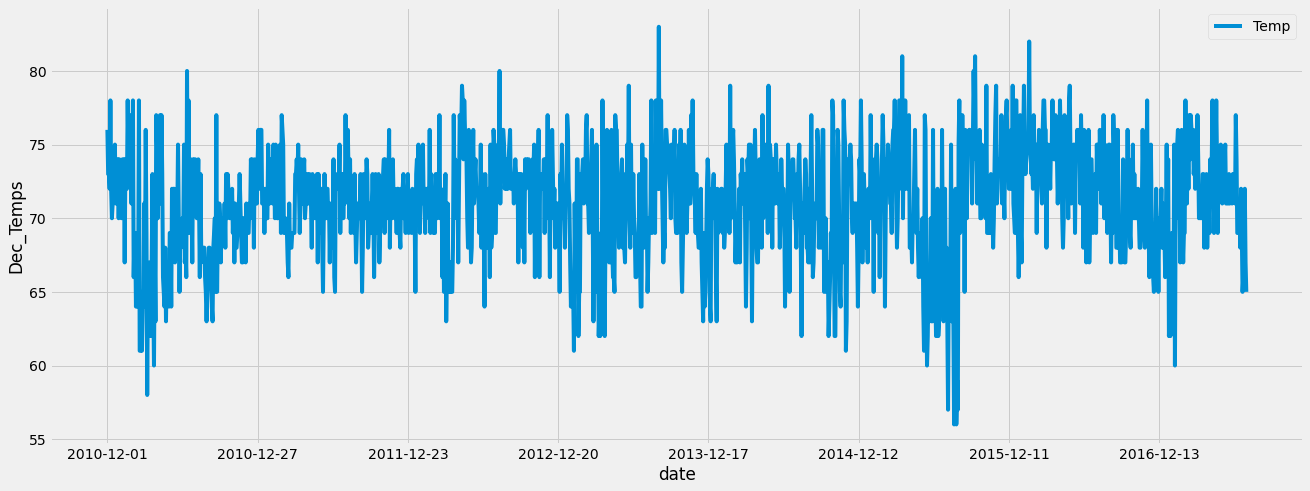

In [26]:
Dec_Temp_df.plot(figsize = (20,7.5))
plt.ylabel ("Dec_Temps")

In [27]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_Temp_df.describe()

,Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Deliverable 3: Two additional queries to gather more weather data for June and December
We can create a query to gather information about precipitation just like we did in the module for the months of June and December

In [15]:
#find precipitation for June

June_Prcp =[]
June_Prcp = session.query(Measurement.date, Measurement.prcp)\
            .filter(extract('month', Measurement.date) == 6)\
            .order_by(Measurement.date.asc())\
            .all()


In [17]:
# Create a DataFrame from the Prcp for the month of June. 
June_Prcp_df = pd.DataFrame(June_Prcp, columns = ['date','precipitation'])
June_Prcp_df.set_index(June_Prcp_df['date'], inplace=True)
June_Prcp_df = June_Prcp_df[['precipitation']]
June_Prcp_df = June_Prcp_df.dropna()

June_Prcp = June_Prcp_df.groupby(['date']).mean()['precipitation']
June_Prcp_df

,precipitation
date,
2010-06-01,0.00
2010-06-01,0.03
2010-06-01,0.01
2010-06-01,0.00
2010-06-01,0.03
...,...
2017-06-30,0.00
2017-06-30,0.12
2017-06-30,0.07


In [28]:
June_Prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


Text(0, 0.5, 'June_Prcp')

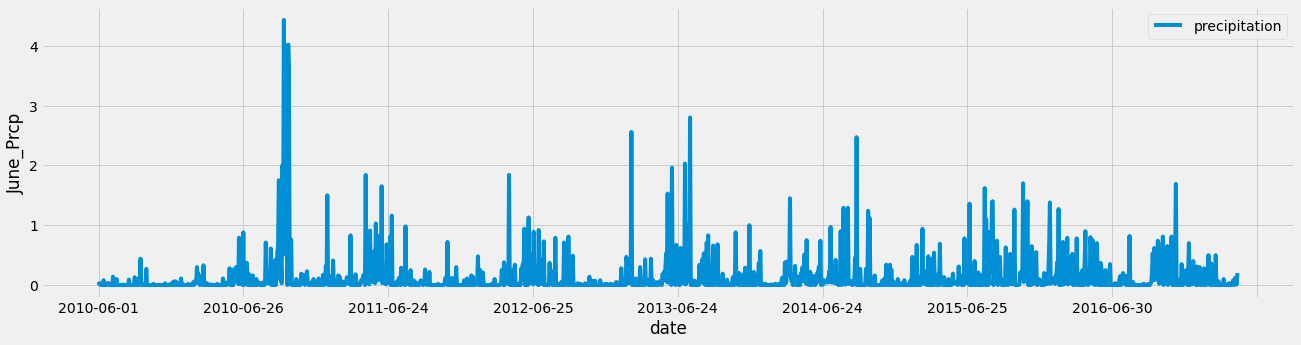

In [19]:
June_Prcp_df.plot(figsize = (20,5))
plt.ylabel ("June_Prcp")

In [20]:
#find precipitation for June

Dec_Prcp =[]
Dec_Prcp = session.query(Measurement.date, Measurement.prcp)\
            .filter(extract('month', Measurement.date) == 12)\
            .order_by(Measurement.date.asc())\
            .all()

In [21]:
# Create a DataFrame from Prcp for the month of June. 
Dec_Prcp_df = pd.DataFrame(Dec_Prcp, columns = ['date','precipitation'])
Dec_Prcp_df.set_index(Dec_Prcp_df['date'], inplace=True)
Dec_Prcp_df = Dec_Prcp_df[['precipitation']]
Dec_Prcp_df = Dec_Prcp_df.dropna()

Dec_Prcp = Dec_Prcp_df.groupby(['date']).mean()['precipitation']
Dec_Prcp_df

,precipitation
date,
2010-12-01,0.04
2010-12-01,0.76
2010-12-01,0.03
2010-12-01,0.70
2010-12-01,0.03
...,...
2016-12-31,0.01
2016-12-31,0.62
2016-12-31,0.36


In [22]:
Dec_Prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


Text(0, 0.5, 'Dec_Prcp')

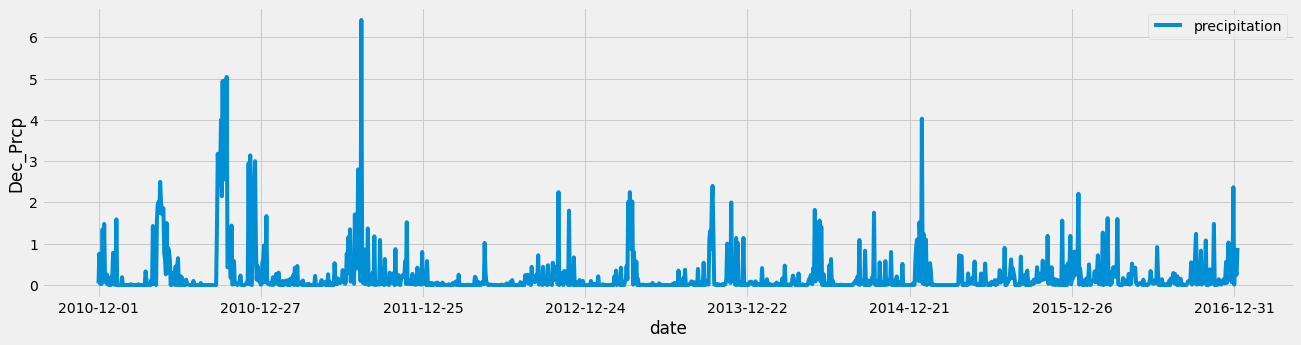

In [23]:
Dec_Prcp_df.plot(figsize = (20,5))
plt.ylabel ("Dec_Prcp")

# DONE!!!